# Uber ride fare prediction using regression algorithms

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/Users/shreyas/Downloads/RAW/codes/uber.csv")

## Creating Data Copy

In [5]:
df = data.copy()

In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [11]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x165f8b890>,
 'caps': [<matplotlib.lines.Line2D at 0x165f3d2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12f66a790>],
 'medians': [<matplotlib.lines.Line2D at 0x165f3ea50>],
 'fliers': [<matplotlib.lines.Line2D at 0x165f3f5d0>],
 'means': []}

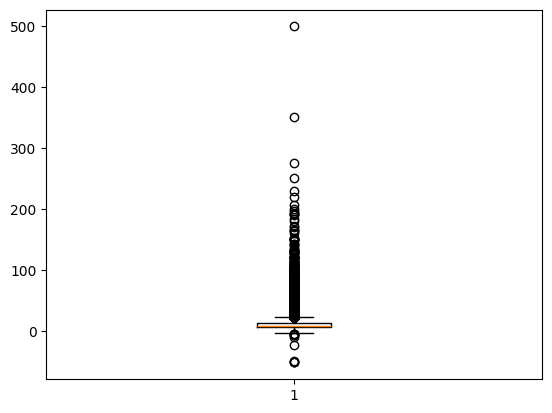

In [14]:
plt.boxplot(df['fare_amount'])

## Remove Outliers

In [15]:
q_low = df['fare_amount'].quantile(0.01)
q_hi = df['fare_amount'].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [16]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop("fare_amount", axis=1)

In [20]:
y = df['fare_amount']

In [21]:
X['pickup_datetime'] = pd.to_numeric(pd.to_datetime(X['pickup_datetime']))

In [22]:
X = X.loc[ : , X.columns.str.contains('^Unnamed')]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lrmodel = LinearRegression()

In [26]:
lrmodel.fit(x_train, y_train)

LinearRegression()

In [27]:
predict = lrmodel.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))

In [30]:
print("RMSE error for the model is: ", lrmodelrmse)

RMSE error for the model is:  8.063863046328835


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [33]:
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [34]:
rfrmodel_pred = rfrmodel.predict(x_test)

In [35]:
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))

In [36]:
print('RMSE value for random Forest is:', rfrmodel_rmse)

RMSE value for random Forest is: 9.757713738069647
